Model Accuracy: 0.10
                 precision    recall  f1-score   support

        Allergy       0.00      0.00      0.00         3
     Bronchitis       0.00      0.00      0.00         3
       COVID-19       0.00      0.00      0.00         3
           Cold       0.00      0.00      0.00         6
         Dengue       0.25      0.50      0.33         2
            Flu       0.00      0.00      0.00         1
        Malaria       0.14      0.20      0.17         5
       Migraine       0.25      1.00      0.40         1
        Typhoid       0.00      0.00      0.00         3
Viral Infection       0.00      0.00      0.00         3

       accuracy                           0.10        30
      macro avg       0.06      0.17      0.09        30
   weighted avg       0.05      0.10      0.06        30



/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


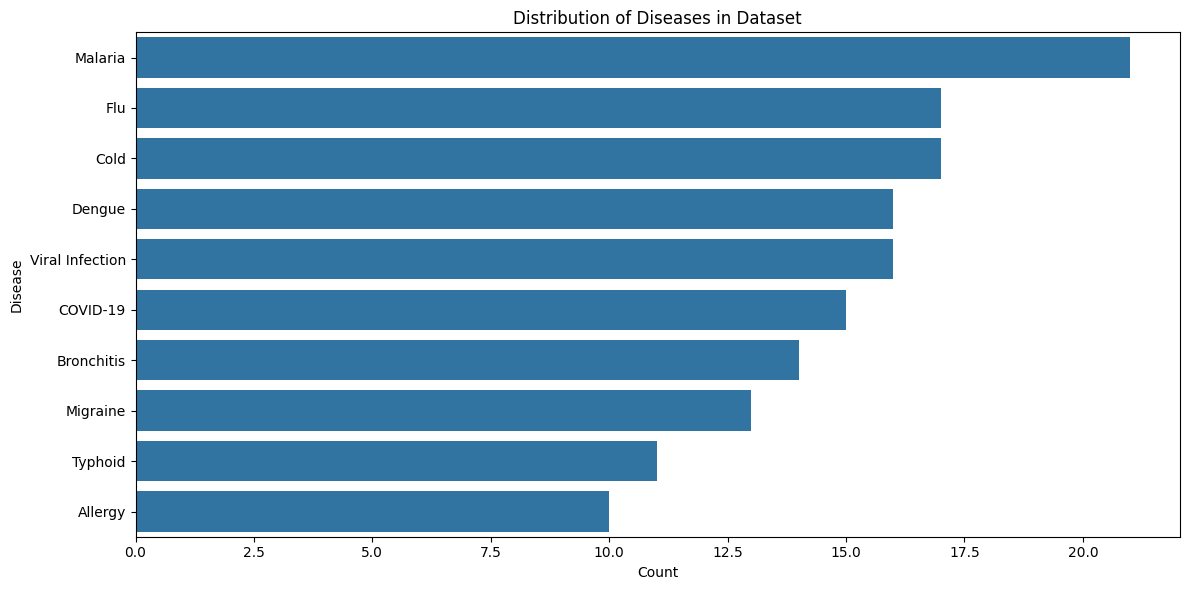

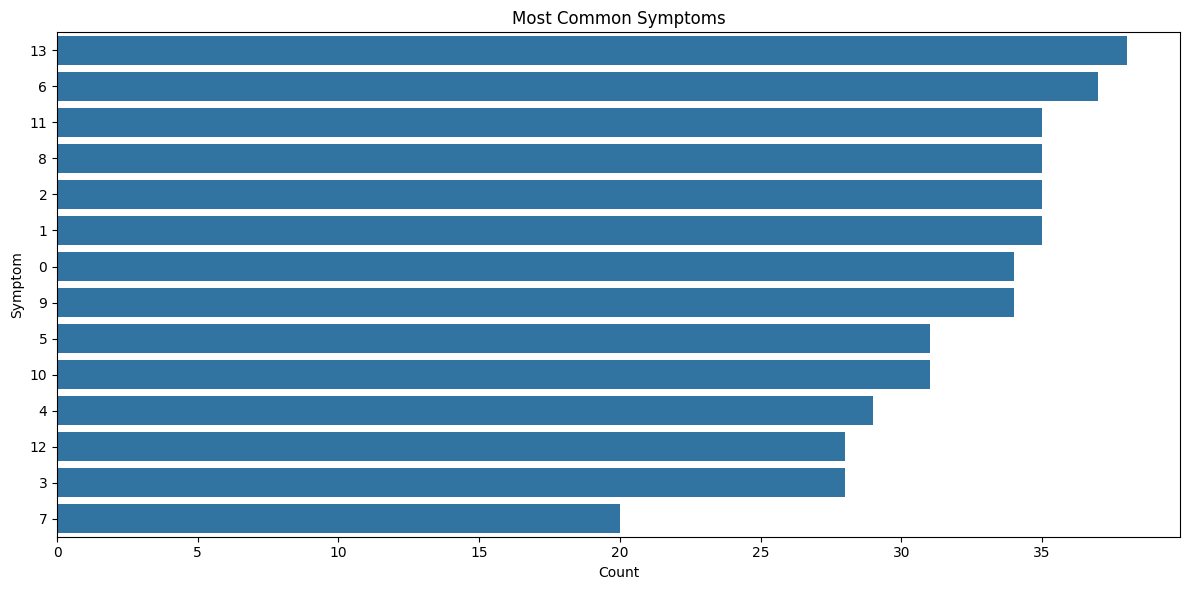

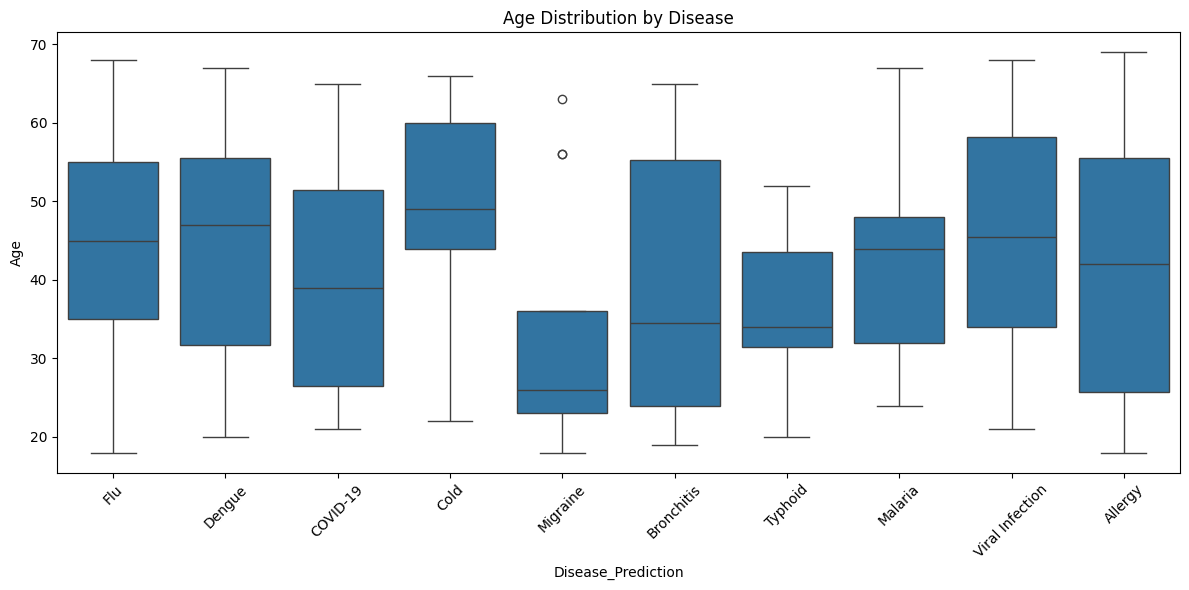


Enter patient details for disease prediction:

Predicted Disease: Malaria
Prediction Probabilities:
Allergy: 0.02
Bronchitis: 0.14
COVID-19: 0.09
Cold: 0.05
Dengue: 0.08
Flu: 0.13
Malaria: 0.16
Migraine: 0.13
Typhoid: 0.06
Viral Infection: 0.14


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score

# Load the dataset
data = pd.read_csv('human_disease_prediction_150.csv')

# Preprocessing
# Convert temperature to numeric
data['Body_Temperature'] = data['Body_Temperature'].str.replace('°F', '').astype(float)
data['Heart_Rate'] = data['Heart_Rate'].str.replace(' bpm', '').astype(int)

# Convert duration to days (assuming all durations are in days)
data['Duration'] = data['Duration'].str.replace(' days', '').astype(int)

# Encode categorical variables
label_encoders = {}
categorical_cols = ['Gender', 'Symptom_1', 'Symptom_2', 'Symptom_3']
for col in categorical_cols:
    le = LabelEncoder()
    data[col] = le.fit_transform(data[col])
    label_encoders[col] = le

# Prepare features and target
X = data.drop(['Name', 'Disease_Prediction'], axis=1)
y = data['Disease_Prediction']

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train model
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Evaluation
y_pred = model.predict(X_test)
print(f"Model Accuracy: {accuracy_score(y_test, y_pred):.2f}")
print(classification_report(y_test, y_pred))

# Visualization 1: Disease Distribution
plt.figure(figsize=(12, 6))
sns.countplot(y='Disease_Prediction', data=data, order=data['Disease_Prediction'].value_counts().index)
plt.title('Distribution of Diseases in Dataset')
plt.xlabel('Count')
plt.ylabel('Disease')
plt.tight_layout()
plt.show()

# Visualization 2: Symptoms Analysis
symptoms = pd.concat([data['Symptom_1'], data['Symptom_2'], data['Symptom_3']])
plt.figure(figsize=(12, 6))
sns.countplot(y=symptoms, order=symptoms.value_counts().index)
plt.title('Most Common Symptoms')
plt.xlabel('Count')
plt.ylabel('Symptom')
plt.tight_layout()
plt.show()

# Visualization 3: Age Distribution by Disease
plt.figure(figsize=(12, 6))
sns.boxplot(x='Disease_Prediction', y='Age', data=data)
plt.title('Age Distribution by Disease')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# User input function
def get_user_input():
    print("\nEnter patient details for disease prediction:")
    age = int(input("Age: "))
    gender = input("Gender (Male/Female): ").capitalize()
    weight = float(input("Weight (kg): "))
    symptom1 = input("Primary Symptom: ").capitalize()
    symptom2 = input("Secondary Symptom: ").capitalize()
    symptom3 = input("Tertiary Symptom: ").capitalize()
    duration = int(input("Duration of symptoms (in days): "))
    temp = float(input("Body Temperature (°F): "))
    heart_rate = int(input("Heart Rate (bpm): "))

    # Encode categorical inputs
    gender_encoded = label_encoders['Gender'].transform([gender])[0]
    sym1_encoded = label_encoders['Symptom_1'].transform([symptom1])[0]
    sym2_encoded = label_encoders['Symptom_2'].transform([symptom2])[0]
    sym3_encoded = label_encoders['Symptom_3'].transform([symptom3])[0]

    return pd.DataFrame([[age, gender_encoded, weight, sym1_encoded, sym2_encoded, sym3_encoded, duration, temp, heart_rate]],
                       columns=X.columns)

# Main program
while True:
    user_data = get_user_input()
    prediction = model.predict(user_data)
    probability = model.predict_proba(user_data)

    print(f"\nPredicted Disease: {prediction[0]}")
    print("Prediction Probabilities:")
    for disease, prob in zip(model.classes_, probability[0]):
        print(f"{disease}: {prob:.2f}")

    continue_pred = input("\nMake another prediction? (y/n): ").lower()
    if continue_pred != 'y':
        break